### Workspace Setup

In [9]:
# Data manipulation and math
import numpy as np 
from scipy.integrate import odeint
from scipy.optimize import fsolve
from sympy import symbols, Function, Eq, solve, dsolve
from sympy import lambdify, exp, sqrt, sin, cos
from sympy import simplify, diff

# Set the random seed for reproducibility
np.random.seed(42)  

# Graphs and visualization
import matplotlib.pyplot as plt 

# Randomization
import random 

# Solving autonomous and homogenous bidimensional systems of ordinary differential equations (ODEs)

## Code using SymPy to solve the ODEs analytically.

### Functions definitions.

In [ ]:
from sympy.abc import a, b, c, d, t

# define the variables and parameters
# t = symbols('t')
# a, b, c, d = symbols('a b c d')

def solve_odes(a, b, c, d):
    # x = Function('x')(t)
    # y = Function('y')(t)
    x, y = symbols('x y', cls=Function)
    x = x(t)
    y = y(t)

    eq1 = Eq(x.diff(t), a*x + b*y)
    eq2 = Eq(y.diff(t), c*x + d*y)
    solution = dsolve((eq1, eq2))

    return solution

def find_fixed_points(a, b, c, d):
    xf, yf = symbols('xf yf')
    eq1_fp = Eq(a*xf + b*yf, 0)
    eq2_fp = Eq(c*xf + d*yf, 0)
    fixed_points = solve((eq1_fp, eq2_fp), (xf, yf))

    return fixed_points

def solve_initial_conditions(solution, x0, y0, a_val, b_val, c_val, d_val):
    C1, C2 = symbols('C1 C2')
    init_cond_x = Eq(solution[0].rhs.subs({t: 0, a: a_val, b: b_val, c: c_val, d: d_val}), x0)
    init_cond_y = Eq(solution[1].rhs.subs({t: 0, a: a_val, b: b_val, c: c_val, d: d_val}), y0)
    C1_C2_solution = solve((init_cond_x, init_cond_y), (C1, C2))

    return C1_C2_solution

def plot_results_linear(time, x_vals, y_vals, x0, y0, xf_val, yf_val, a_val, b_val, c_val, d_val):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].plot(time, x_vals, label='x(t)')
    axs[0].plot(time, y_vals, label='y(t)')
    axs[0].grid()
    axs[0].legend()
    axs[0].set_xlabel('t')
    axs[0].set_title('Time evolution')
    axs[1].plot(x_vals, y_vals, label='Orbit')
    axs[1].plot(x0, y0, 'ro', label='Initial condition')
    axs[1].plot(xf_val, yf_val, 'go', label='Fixed point')

    # calculate the vector field
    X, Y = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
    U = a_val * X + b_val * Y
    V = c_val * X + d_val * Y
    # normalize the arrows so that their size represents their speed
    N = np.sqrt(U**2+V**2)  
    N[N == 0] = 1
    U = U / N
    V = V / N
    # plot the vector field
    axs[1].quiver(X, Y, U, V, color='r', alpha=0.5)

    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')
    axs[1].set_title('Phase plane')
    axs[1].grid()
    axs[1].legend(loc='upper right')
    plt.tight_layout()
    plt.show()

def plot_3D_trajectory(x_vals, y_vals, time):
    fig = plt.figure(figsize=(18, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_vals, y_vals, time, label='Trajectory')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('t')
    ax.set_title('3D Trajectory')
    ax.legend()
    plt.show()

### Main function

x(t) = -2*C1*m*exp(-t*(alpha - sqrt(alpha**2 - 4*k*m))/(2*m))/(alpha - sqrt(alpha**2 - 4*k*m)) - 2*C2*m*exp(-t*(alpha + sqrt(alpha**2 - 4*k*m))/(2*m))/(alpha + sqrt(alpha**2 - 4*k*m))
y(t) = C1*exp(-t*(alpha - sqrt(alpha**2 - 4*k*m))/(2*m)) + C2*exp(-t*(alpha + sqrt(alpha**2 - 4*k*m))/(2*m))
{xf: 0, yf: 0}

x(t) = (0.075*C1 + 0.997183533758957*C2)*exp(-0.075*t)*sin(0.997183533758957*t) + (0.997183533758957*C1 - 0.075*C2)*exp(-0.075*t)*cos(0.997183533758957*t)
y(t) = -1.0*C1*exp(-0.075*t)*sin(0.997183533758957*t) + 1.0*C2*exp(-0.075*t)*cos(0.997183533758957*t)


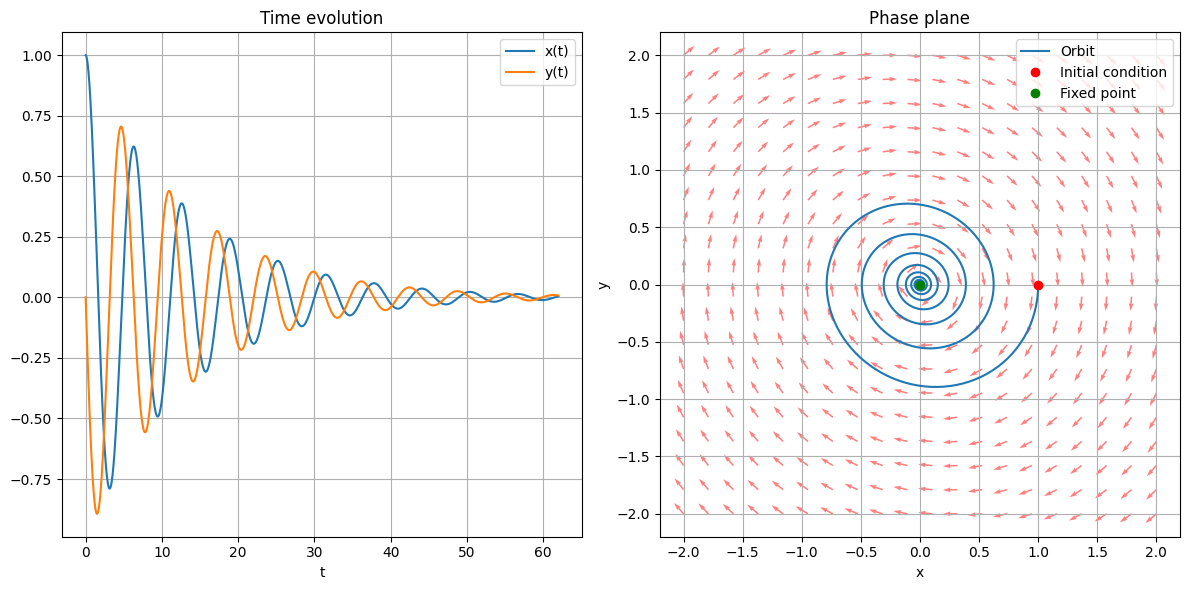

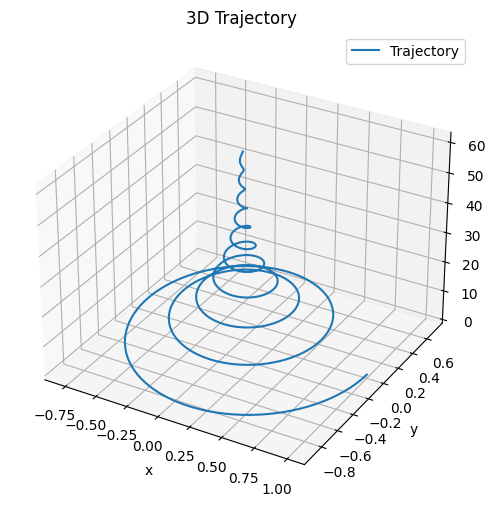

In [ ]:
def main():

    # Define new parameters
    k, m, alpha = symbols('k m alpha')   

    solution_Symbolic = solve_odes(0, 1, -k/m, -alpha/m)
    print(f"x(t) = {solution_Symbolic[0].rhs}")
    print(f"y(t) = {solution_Symbolic[1].rhs}")

    fixed_points_Symbolic = find_fixed_points(0, 1, -k/m, -alpha/m)    
    print(fixed_points_Symbolic)

    # Define new parameters values
    k_val, m_val, alpha_val = 1, 1, 0.15

    # Set parameters
    a_val, b_val, c_val, d_val = 0, 1, -k_val/m_val, -alpha_val/m_val
    solution_Symbolic = solve_odes(a_val, b_val, c_val, d_val)
    print(f"\nx(t) = {solution_Symbolic[0].rhs}")
    print(f"y(t) = {solution_Symbolic[1].rhs}")

    # Initial conditions: x0 and y0
    x0 = 1
    y0 = 0

    solution = solve_odes(a,b,c,d)
    fixed_points = find_fixed_points(a,b,c,d)
    xf_val, yf_val = fixed_points[symbols('xf')], fixed_points_Symbolic[symbols('yf')]
    
    C1_C2_solution = solve_initial_conditions(solution, x0, y0, a_val, b_val, c_val, d_val)

    # substitute C1, C2, a, b, c, d values into the solutions
    x_sol = solution[0].rhs.subs({**C1_C2_solution, a: a_val, b: b_val, c: c_val, d: d_val})
    y_sol = solution[1].rhs.subs({**C1_C2_solution, a: a_val, b: b_val, c: c_val, d: d_val})

    # lambdify the solutions
    x_sol_func = lambdify(t, x_sol, modules=["numpy"])
    y_sol_func = lambdify(t, y_sol, modules=["numpy"])

    # generate time values
    time = np.linspace(0, 62, 1000)

    # calculate x(t) and y(t)
    x_vals = x_sol_func(time)
    y_vals = y_sol_func(time)

    # plot_results(time, x_vals, y_vals, x0, y0, xf_val, yf_val)
    # Call the plot_results function
    plot_results_linear(time, x_vals, y_vals, x0, y0, xf_val, yf_val, a_val, b_val, c_val, d_val)

    # plot the 3D trajectory
    plot_3D_trajectory(x_vals, y_vals, time)

if __name__ == "__main__":
    main()

### Code to verify the analytical solutions.

In [ ]:
C1, C2 = symbols('C1 C2')

# Define new parameters values
# k_val, m_val, alpha_val = 1, 1, 0.15

# Set parameters
# a_val, b_val, c_val, d_val = 0, 1, -k_val/m_val, -alpha_val/m_val
# solution_Symbolic = solve_odes(a_val, b_val, c_val, d_val)

# Define new parameters
k, m, alpha = symbols('k m alpha')   
solution_Symbolic = solve_odes(0, 1, -k/m, -alpha/m)

# x(t) and y(t) are the solutions to the differential equations
x_t = solution_Symbolic[0].rhs
y_t = solution_Symbolic[1].rhs

print(f"\nx(t) = {solution_Symbolic[0].rhs}")
print(f"y(t) = {solution_Symbolic[1].rhs}")

# Take derivative of x(t)
dxdt = diff(x_t, t)

print("\n",simplify(dxdt))
print(simplify(y_t))

# Compare y(t) and dx/dt
print("\n",Eq(dxdt, y_t))

# Simplify the equation
simplified_equation = simplify(Eq(dxdt, y_t))

print("\n",simplified_equation)



x(t) = -2*C1*m*exp(-t*(alpha - sqrt(alpha**2 - 4*k*m))/(2*m))/(alpha - sqrt(alpha**2 - 4*k*m)) - 2*C2*m*exp(-t*(alpha + sqrt(alpha**2 - 4*k*m))/(2*m))/(alpha + sqrt(alpha**2 - 4*k*m))
y(t) = C1*exp(-t*(alpha - sqrt(alpha**2 - 4*k*m))/(2*m)) + C2*exp(-t*(alpha + sqrt(alpha**2 - 4*k*m))/(2*m))

 (C1*exp(t*sqrt(alpha**2 - 4*k*m)/m) + C2)*exp(-t*(alpha + sqrt(alpha**2 - 4*k*m))/(2*m))
(C1*exp(t*sqrt(alpha**2 - 4*k*m)/m) + C2)*exp(-t*(alpha + sqrt(alpha**2 - 4*k*m))/(2*m))

 True

 True


## Code using SciPy to solve the ODEs numerically.

### Functions definitions.

In [ ]:
# Define the system of ODEs
def system(state, t, a, b, c, d):
    x, y = state
    dxdt = a*x + b*y
    dydt = c*x + d*y
    return [dxdt, dydt]

def equations(vars, a, b, c, d):
    x, y = vars
    eq1 = a*x + b*y
    eq2 = c*x + d*y
    return [eq1, eq2]

def solve_odes_Num(state0, t, a, b, c, d):
    state = odeint(system, state0, t, args=(a,b,c,d))
    return state

def find_fixed_points_Num(a, b, c, d):
    fixed_points = fsolve(equations, (2, 1), args=(a, b, c, d))#  Newton-Raphson method by default
    return fixed_points

def plot_results_linear(time, x_vals, y_vals, x0, y0, xf_val, yf_val, a_val, b_val, c_val, d_val):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].plot(time, x_vals, label='x(t)')
    axs[0].plot(time, y_vals, label='y(t)')
    axs[0].grid()
    axs[0].legend()
    axs[0].set_xlabel('t')
    axs[0].set_title('Time evolution')
    axs[1].plot(x_vals, y_vals, label='Orbit')
    axs[1].plot(x0, y0, 'ro', label='Initial condition')
    axs[1].plot(xf_val, yf_val, 'go', label='Fixed point')

    # calculate the vector field
    X, Y = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
    U = a_val * X + b_val * Y
    V = c_val * X + d_val * Y
    # normalize the arrows so that their size represents their speed
    N = np.sqrt(U**2+V**2)  
    N[N == 0] = 1
    U = U / N
    V = V / N
    # plot the vector field
    axs[1].quiver(X, Y, U, V, color='r', alpha=0.5)

    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')
    axs[1].set_title('Phase plane')
    axs[1].grid()
    axs[1].legend(loc='upper right')
    plt.tight_layout()
    plt.show()

def plot_3D_trajectory(x_vals, y_vals, time):
    fig = plt.figure(figsize=(18, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_vals, y_vals, time, label='Trajectory')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('t')
    ax.set_title('3D Trajectory')
    ax.legend()
    plt.show()


### Main function

The fixed points are at x=0.0 and y=0.0


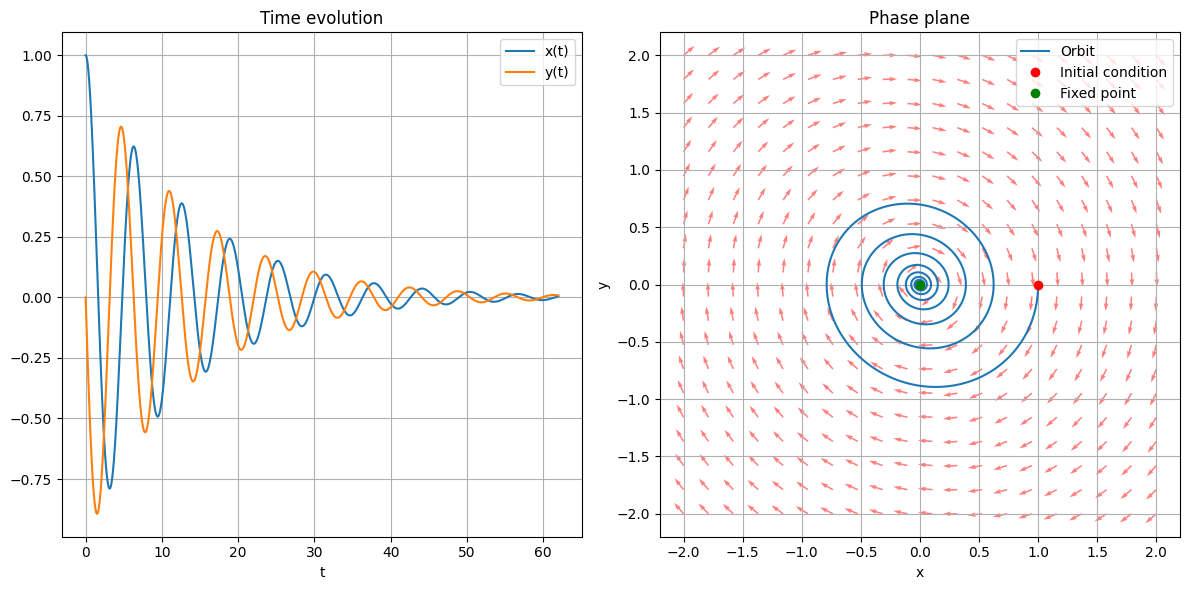

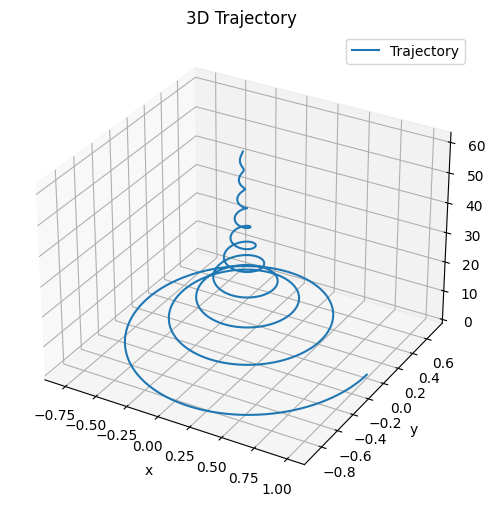

In [ ]:
def main():

    # Define new parameters values
    k_val, m_val, alpha_val = 1, 1, 0.15

    # Set parameters
    a_val, b_val, c_val, d_val = 0, 1, -k_val/m_val, -alpha_val/m_val
    state0 = [1.0, 0]

    # set parameters and initial conditions
    # a_val, b_val, c_val, d_val = 0.001, 0.2, -0.1, -0.1 #  0.1, 0.2, -0.1, -0.1
    # state0 = [1.0, 2.0]
    t = np.arange(0.0, 62.0, 0.01)

    # solve the system of ODEs
    state = solve_odes_Num(state0, t, a_val, b_val, c_val, d_val)

    # find the fixed points
    xf_val, yf_val = find_fixed_points_Num(a_val, b_val, c_val, d_val)
    print(f"The fixed points are at x={xf_val} and y={yf_val}")

    # extract the solutions
    x_vals = state[:, 0]
    y_vals = state[:, 1]

    # plot the results
    plot_results_linear(t, x_vals, y_vals, state0[0], state0[1], xf_val, yf_val, a_val, b_val, c_val, d_val)

    # plot the 3D trajectory
    plot_3D_trajectory(x_vals, y_vals, t)

if __name__ == "__main__":
    main()

## Code using SciPy to solve the ODEs numerically using matrix notation.

Code expressing the linear system of ODEs in the form of a matrix equation.

The determinant and the eigenvalues of the matrix A can give some insights about the system:

- If the determinant of A is not zero, the system has a unique solution.
- If the real parts of all eigenvalues of A are negative, the system is stable.
- If the real part of at least one eigenvalue is positive, the system is unstable.

- Real eigenvalues ($ \lambda_1 $ and $ \lambda_2 $):

    - Case 1: Both negative

        - 1.1: $ \lambda_1 < \lambda_2 $: ex1

        - 1.2: $ \lambda_1 > \lambda_2 $: ex2

        - 1.3: $ \lambda_1 = \lambda_2 $: ex3

    - Case 2: Both positive

        - 2.1: $ \lambda_1 < \lambda_2 $: ex4

        - 2.2: $ \lambda_1 > \lambda_2 $: ex5

        - 2.3: $ \lambda_1 = \lambda_2 $: ex6

    - Case 3: One positive, one negative: ex7 and ex8

    - Case 4: One zero, one non-zero: ex9 and ex10

- Complex eigenvalues: ex11 to ex16 (β < 0 and β > 0)

    - Case 1: If $ \alpha  > 0 $

    - Case 2: If $ \alpha  < 0 $

    - Case 3: If $ \alpha  = 0 $

- Non-diagonalizable system with real and equal eigenvalues: ex17 and ex18 ($ \lambda > 0 $ and $ \lambda < 0 $)

### Functions definitions.

In [30]:
# Define the system of ODEs
def system(state, t, A):
    return np.dot(A, state)

def equations(state, A):
    return np.dot(A, state)

def solve_odes_Num(state0, t, A):
    state = odeint(system, state0, t, args=(A,))
    return state

def find_fixed_points_Num(A):
    fixed_points = fsolve(equations, (2, 1), args=(A,))
    return fixed_points

def system_properties(A):
    det = np.linalg.det(A)  # Determinant
    eigvals, eigvecs = np.linalg.eig(A)  # Eigenvalues and eigenvectors
    diag_matrix = np.diag(eigvals)  # Diagonal matrix of eigenvalues

    # Check stability based on eigenvalues
    if np.all(np.real(eigvals) < 0):
        stability = 'All fixed points of the system are stable.'
    elif np.any(np.real(eigvals) > 0):
        stability = 'There exists at least one unstable fixed point in the system.'
    else:
        stability = 'The system is marginally stable.'

    # Check uniqueness of the solution
    if det != 0:
        uniqueness = 'The system has a unique solution.'
    else:
        uniqueness = 'The system does not have a unique solution.'

    # Eigen spaces
    eigen_spaces = {val: vec for val, vec in zip(eigvals, eigvecs.T)}

    # Return the results
    return {
        'determinant': det,
        'eigenvalues': eigvals,
        'eigenvectors': eigvecs,
        'diagonal matrix': diag_matrix,
        'eigen spaces': eigen_spaces
    }, stability, uniqueness

def plot_results_linear(time, x_vals, y_vals, x0, y0, xf_val, yf_val, a_val, b_val, c_val, d_val, eigvals, eigvecs):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].plot(time, x_vals, label='x(t)')
    axs[0].plot(time, y_vals, label='y(t)')
    axs[0].grid()
    axs[0].legend()
    axs[0].set_xlabel('t')
    axs[0].set_title('Time evolution')
    axs[1].plot(x_vals, y_vals, label='Orbit')
    axs[1].plot(x0, y0, 'ro', label='Initial condition')
    axs[1].plot(xf_val, yf_val, 'go', label='Fixed point')

    # calculate the vector field
    X, Y = np.meshgrid(np.linspace(-150, 150, 20), np.linspace(-150, 150, 20))
    U = a_val * X + b_val * Y
    V = c_val * X + d_val * Y
    # normalize the arrows so that their size represents their speed
    N = np.sqrt(U**2+V**2)  
    N[N == 0] = 1
    U = U / N
    V = V / N
    # plot the vector field
    axs[1].quiver(X, Y, U, V, color='r', alpha=0.5)

    # plot the eigenspaces
    for eigenvalue, eigenvector in zip(eigvals, eigvecs.T):
        if np.isreal(eigenvalue):
            start, end = -100 * eigenvector, 100 * eigenvector  
            axs[1].plot([start[0], end[0]], [start[1], end[1]], 'k--')

            # place the label at the end of the line
            axs[1].text(end[0], end[1], f'Eigenvalue: {round(eigenvalue, 4)}', va='center', ha='center')

    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')
    axs[1].set_title('Phase plane')
    axs[1].grid()
    axs[1].legend(loc='upper right')
    plt.tight_layout()
    plt.show()

def plot_3D_trajectory(x_vals, y_vals, time):
    fig = plt.figure(figsize=(18, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_vals, y_vals, time, label='Trajectory')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('t')
    ax.set_title('3D Trajectory')
    ax.legend()
    plt.show()


### Main function


System properties:
Determinant: 0.81

Eigenvalues: 
[0.9, 0.9]

Eigenvectors: 
[[ 1.00000000e+00, -1.00000000e+00],
 [ 0.00000000e+00,  1.99840144e-16]]

Diagonal matrix of eigenvalues: 
[[0.9, 0. ],
 [0. , 0.9]]

Eigen space for eigenvalue 0.9: 
[-1.00000000e+00,  1.99840144e-16]

There exists at least one unstable fixed point in the system.
The system has a unique solution.
The fixed points are at x=0.0 and y=0.0


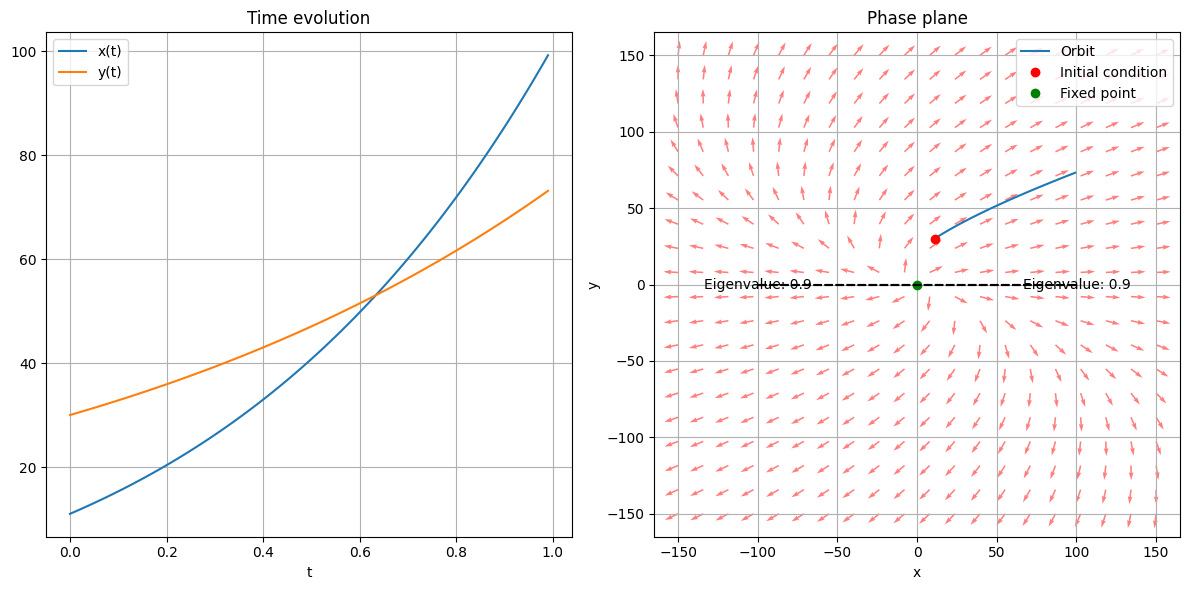

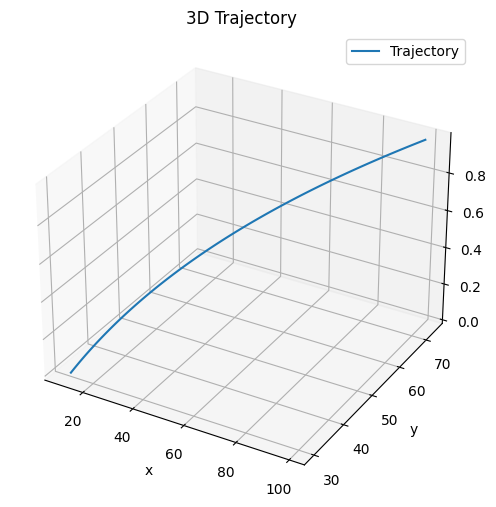

In [ ]:
def main():
    # Define parameter exs
    param_exs = {
        'ex1': np.array([[-0.8, 0.0], [0.0, -0.4]]),  # both eigenvalues are negative, lambda_1 < lambda_2
        'ex2': np.array([[-0.4, 0.0], [0.0, -0.8]]),  # both eigenvalues are negative, lambda_1 > lambda_2
        'ex3': np.array([[-0.8, 0.0], [0.0, -0.8]]),  # both eigenvalues are negative, lambda_1 = lambda_2
        'ex4': np.array([[0.4, 0.0], [0.0, 0.8]]),  # both eigenvalues are positive, lambda_1 < lambda_2
        'ex5': np.array([[0.8, 0.0], [0.0, 0.4]]),  # both eigenvalues are positive, lambda_1 > lambda_2
        'ex6': np.array([[0.8, 0.0], [0.0, 0.8]]),  # both eigenvalues are positive, lambda_1 = lambda_2
        'ex7': np.array([[0.3, 0.0], [0.0, -0.4]]),  # one eigenvalue is positive, the other is negative. lambda_1 > 0 and  lambda_2 < 0
        'ex8': np.array([[-0.3, 0.0], [0.0, 0.4]]),  # one eigenvalue is negative, the other is positive. lambda_1 < 0 and  lambda_2 > 0
        'ex9': np.array([[0.0, 0.0], [0.0, 0.4]]),  # one eigenvalue is zero, the other is positive. lambda_1 = 0 and  lambda_2 > 0
        'ex10': np.array([[0.4, 0.0], [0.0, 0.0]]),  # one eigenvalue is positive, the other is zero. lambda_1 > 0 and  lambda_2 = 0
        'ex11': np.array([[0.0, 1.0], [-1.0, 0.0]]),  # complex eigenvalues, α = 0, β < 0
        'ex12': np.array([[0.0, -1.0], [1.0, 0.0]]),  # complex eigenvalues, α = 0, β > 0
        'ex13': np.array([[-0.1, 1.0], [-1.0, -0.1]]),  # complex eigenvalues, α < 0, β < 0
        'ex14': np.array([[-0.1, -1.0], [1.0, -0.1]]),  # complex eigenvalues, α < 0, β > 0
        'ex15': np.array([[0.1, 1.0], [-1.0, 0.1]]),  # complex eigenvalues, α > 0, β < 0
        'ex16': np.array([[0.1, -1.0], [1.0, 0.1]]),  # complex eigenvalues, α > 0, β > 0
        'ex17': np.array([[0.9, 1], [0.0, 0.9]]),  # non-diagonalizable with real and equal eigenvalues: lambda > 0
        'ex18': np.array([[-0.9, 1], [0.0, -0.9]]),  # non-diagonalizable with real and equal eigenvalues: lambda < 0 
        'ex19': np.array([[5.0, -4.0], [4.0, -5.0]])  # General case example 
    }

    # Select the parameter ex you want to use
    selected_ex = 'ex17'
    A = param_exs[selected_ex]
    
    # set parameters and initial conditions
    state0 = [11.0, 30]
    t = np.arange(0.0, 1.0, 0.01)

    # analyze the system
    properties, stability, uniqueness = system_properties(A)
    print('\nSystem properties:')
    print(f"Determinant: {properties['determinant']}\n")
    print(f"Eigenvalues: \n{np.array2string(properties['eigenvalues'], separator=', ')}\n")
    print(f"Eigenvectors: \n{np.array2string(properties['eigenvectors'], separator=', ')}\n")
    print(f"Diagonal matrix of eigenvalues: \n{np.array2string(properties['diagonal matrix'], separator=', ')}\n")
    for eigenvalue, eigenspace in properties['eigen spaces'].items():
        print(f"Eigen space for eigenvalue {eigenvalue}: \n{np.array2string(eigenspace, separator=', ')}\n")
    print(stability)
    print(uniqueness)

    # solve the system of ODEs
    state = solve_odes_Num(state0, t, A)

    # find the fixed points
    xf_val, yf_val = find_fixed_points_Num(A)
    print(f"The fixed points are at x={xf_val} and y={yf_val}")

    # extract the solutions
    x_vals = state[:, 0]
    y_vals = state[:, 1]

    # plot the results
    a, b, c, d = A[0, 0], A[0, 1], A[1, 0], A[1, 1]
    plot_results_linear(t, x_vals, y_vals, state0[0], state0[1], xf_val, yf_val, a, b, c, d, properties['eigenvalues'], properties['eigenvectors'])

    # plot the 3D trajectory
    plot_3D_trajectory(x_vals, y_vals, t)

if __name__ == "__main__":
    main()

### Main function -  damped spring-mass system


System properties:
Determinant: 0.25

Eigenvalues: 
[-0.5, -0.5]

Eigenvectors: 
[[ 0.89442719, -0.89442719],
 [-0.4472136 ,  0.4472136 ]]

Diagonal matrix of eigenvalues: 
[[-0.5,  0. ],
 [ 0. , -0.5]]

Eigen space for eigenvalue -0.5: 
[-0.89442719,  0.4472136 ]

All fixed points of the system are stable.
The system has a unique solution.
The fixed points are at x=0.0 and y=0.0


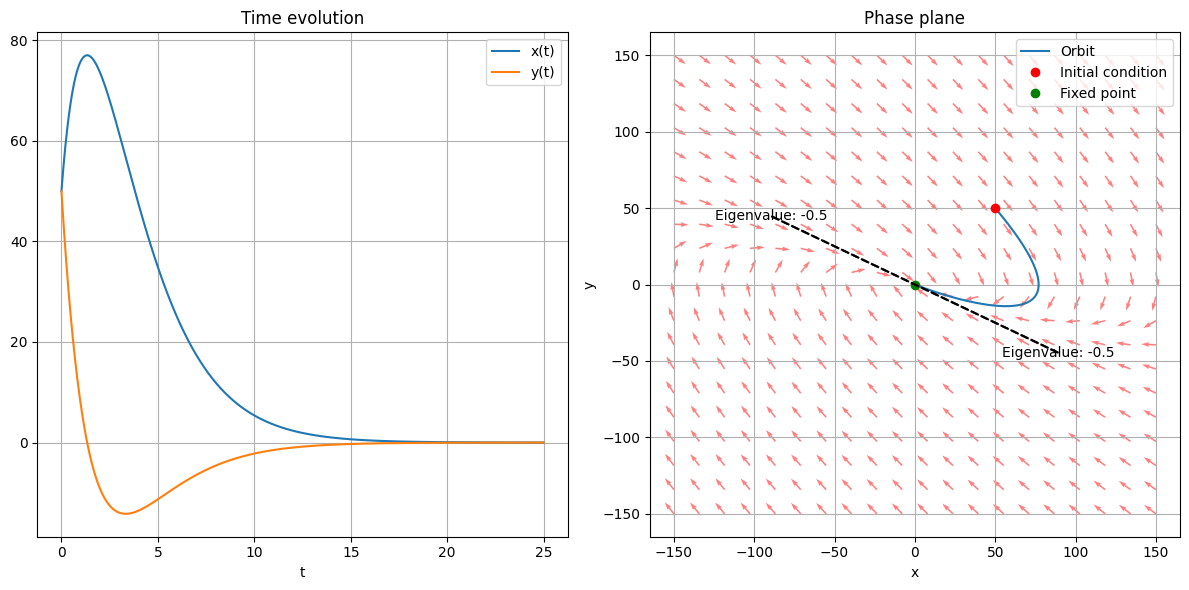

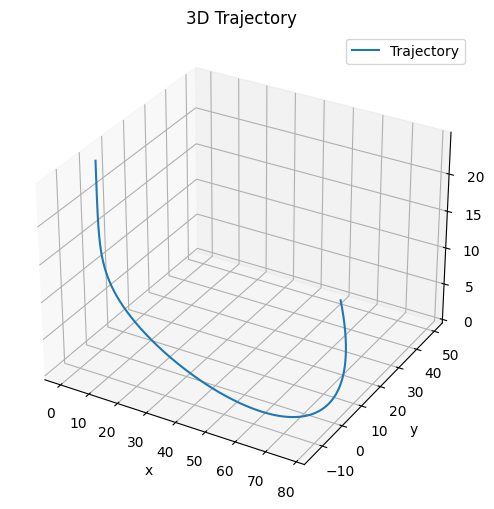

In [32]:
def main():
    # Define parameter exs
    param_exs = {
        'overdamped': {"m": 1, "k": 0.25, "alpha": 1.5},  # alpha^2 > 4*m*k
        'critically_damped': {"m": 1, "k": 0.25, "alpha": 1},  # alpha^2 = 4*m*k
        'underdamped': {"m": 1, "k": 0.25, "alpha": 0.4},  # alpha^2 < 4*m*k        
        'undamped': {"m": 1, "k": 0.25, "alpha": 0}  # alpha = 0
    }

    # Select the parameter ex
    selected_ex = 'critically_damped'
    m = param_exs[selected_ex]['m']
    k = param_exs[selected_ex]['k']
    alpha = param_exs[selected_ex]['alpha']
    
    # checking whether the chosen parameters meet the conditions of the case
    if selected_ex == 'overdamped' and alpha**2 <= 4*m*k:
        raise ValueError("The chosen parameters do not satisfy the overdamped condition")
    elif selected_ex == 'underdamped' and alpha**2 >= 4*m*k:
        raise ValueError("The chosen parameters do not satisfy the underdamped condition")
    elif selected_ex == 'critically_damped' and alpha**2 != 4*m*k:
        raise ValueError("The chosen parameters do not satisfy the critically damped condition")
    elif selected_ex == 'undamped' and alpha != 0:
        raise ValueError("The chosen parameters do not satisfy the undamped condition")
    
    A = np.array([[0, 1], [-k/m, -alpha/m]])
    
    # set parameters and initial conditions
    state0 = [50.0, 50.0]
    t = np.arange(0.0, 25.0, 0.01)

    # analyze the system
    properties, stability, uniqueness = system_properties(A)
    print('\nSystem properties:')
    print(f"Determinant: {properties['determinant']}\n")
    print(f"Eigenvalues: \n{np.array2string(properties['eigenvalues'], separator=', ')}\n")
    print(f"Eigenvectors: \n{np.array2string(properties['eigenvectors'], separator=', ')}\n")
    print(f"Diagonal matrix of eigenvalues: \n{np.array2string(properties['diagonal matrix'], separator=', ')}\n")
    for eigenvalue, eigenspace in properties['eigen spaces'].items():
        print(f"Eigen space for eigenvalue {eigenvalue}: \n{np.array2string(eigenspace, separator=', ')}\n")
    print(stability)
    print(uniqueness)

    # solve the system of ODEs
    state = solve_odes_Num(state0, t, A)

    # find the fixed points
    xf_val, yf_val = find_fixed_points_Num(A)
    print(f"The fixed points are at x={xf_val} and y={yf_val}")

    # extract the solutions
    x_vals = state[:, 0]
    y_vals = state[:, 1]

    # plot the results
    a, b, c, d = A[0, 0], A[0, 1], A[1, 0], A[1, 1]
    plot_results_linear(t, x_vals, y_vals, state0[0], state0[1], xf_val, yf_val, a, b, c, d, properties['eigenvalues'], properties['eigenvectors'])

    # plot the 3D trajectory
    plot_3D_trajectory(x_vals, y_vals, t)

if __name__ == "__main__":
    main()

# Code using SciPy to solve the ODEs numerically using matrix notation: non-homogeneous translation

### Functions definitions.

In [ ]:
def system(state, t, A, b):
    return np.dot(A, state) + b

def equations(state, A, b):
    return np.dot(A, state) + b

def solve_odes_Num(state0, t, A, b):
    state = odeint(system, state0, t, args=(A, b,))
    return state

def find_fixed_points_Num(A, b):
    fixed_points = fsolve(equations, (2, 1), args=(A, b,))
    return fixed_points

def system_properties(A):
    det = np.linalg.det(A)  # Determinant
    eigvals, eigvecs = np.linalg.eig(A)  # Eigenvalues and eigenvectors
    diag_matrix = np.diag(eigvals)  # Diagonal matrix of eigenvalues

    # Check stability based on eigenvalues
    if np.all(np.real(eigvals) < 0):
        stability = 'All fixed points of the system are stable.'
    elif np.any(np.real(eigvals) > 0):
        stability = 'There exists at least one unstable fixed point in the system.'
    else:
        stability = 'The system is marginally stable.'

    # Check uniqueness of the solution
    if det != 0:
        uniqueness = 'The system has a unique solution.'
    else:
        uniqueness = 'The system does not have a unique solution.'

    # Eigen spaces
    eigen_spaces = {val: vec for val, vec in zip(eigvals, eigvecs.T)}

    # Return the results
    return {
        'determinant': det,
        'eigenvalues': eigvals,
        'eigenvectors': eigvecs,
        'diagonal matrix': diag_matrix,
        'eigen spaces': eigen_spaces
    }, stability, uniqueness

def plot_results_linear(time, x_vals, y_vals, x0, y0, xf_val, yf_val, a_val, b_val, c_val, d_val, eigvals, eigvecs, g):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].plot(time, x_vals, label='x(t)')
    axs[0].plot(time, y_vals, label='y(t)')
    axs[0].grid()
    axs[0].legend()
    axs[0].set_xlabel('t')
    axs[0].set_title('Time evolution')
    axs[1].plot(x_vals, y_vals, label='Orbit')
    axs[1].plot(x0, y0, 'ro', label='Initial condition')
    axs[1].plot(xf_val, yf_val, 'go', label='Fixed point')

    # calculate the vector field
    X, Y = np.meshgrid(np.linspace(-150, 150, 20), np.linspace(-150, 150, 20))
    U = a_val * X + b_val * Y + g[0]
    V = c_val * X + d_val * Y + g[1]
    # normalize the arrows so that their size represents their speed
    N = np.sqrt(U**2+V**2)  
    N[N == 0] = 1
    U = U / N
    V = V / N
    # plot the vector field
    axs[1].quiver(X, Y, U, V, color='r', alpha=0.5)

    fixed_point = np.array([xf_val, yf_val])

    # plot the eigenspaces
    for eigenvalue, eigenvector in zip(eigvals, eigvecs.T):
        if np.isreal(eigenvalue):
            # translate the eigenvector by the fixed point coordinates
            start, end = -100 * eigenvector + fixed_point, 100 * eigenvector + fixed_point 
            axs[1].plot([start[0], end[0]], [start[1], end[1]], 'k--')

            # place the label at the end of the line
            axs[1].text(end[0], end[1], f'Eigenvalue: {round(eigenvalue, 4)}', va='center', ha='center')

    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')
    axs[1].set_title('Phase plane')
    axs[1].grid()
    axs[1].legend(loc='upper right')
    plt.tight_layout()
    plt.show()

def plot_3D_trajectory(x_vals, y_vals, time):
    fig = plt.figure(figsize=(18, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_vals, y_vals, time, label='Trajectory')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('t')
    ax.set_title('3D Trajectory')
    ax.legend()
    plt.show()



### Main function

The fixed points are at x=36.666666666666664 and y=53.33333333333333

System properties:
Determinant: -8.999999999999998

Eigenvalues: 
[ 3., -3.]

Eigenvectors (original): 
[[0.89442719, 0.4472136 ],
 [0.4472136 , 0.89442719]]

Eigenvectors (translated): 
[[37.56109386, 37.11388026],
 [53.78054693, 54.22776052]]

Diagonal matrix of eigenvalues: 
[[ 3.,  0.],
 [ 0., -3.]]

Eigen space for eigenvalue 3.0 (original): 
[0.89442719, 0.4472136 ]

Eigen space for eigenvalue 3.0 (translated): 
[[37.56109386, 37.11388026],
 [54.22776052, 53.78054693]]

Eigen space for eigenvalue -3.0 (original): 
[0.4472136 , 0.89442719]

Eigen space for eigenvalue -3.0 (translated): 
[[37.11388026, 37.56109386],
 [53.78054693, 54.22776052]]

There exists at least one unstable fixed point in the system.
The system has a unique solution.


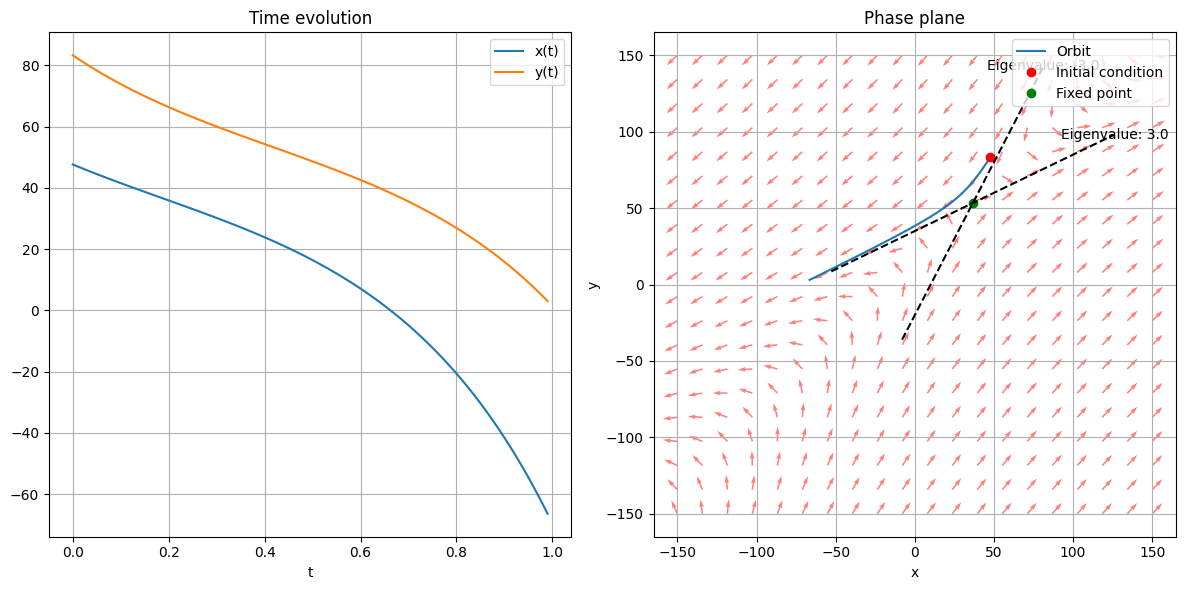

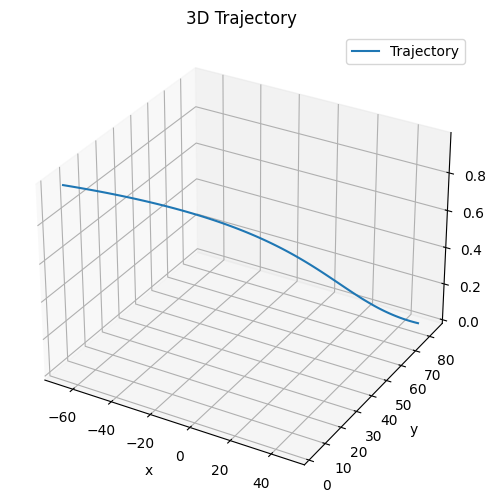

In [ ]:
def main():
    # Define parameter exs
    param_exs = {
        'ex1': np.array([[-0.8, 0.0], [0.0, -0.4]]),  # both eigenvalues are negative, lambda_1 < lambda_2
        'ex2': np.array([[-0.4, 0.0], [0.0, -0.8]]),  # both eigenvalues are negative, lambda_1 > lambda_2
        'ex3': np.array([[-0.8, 0.0], [0.0, -0.8]]),  # both eigenvalues are negative, lambda_1 = lambda_2
        'ex4': np.array([[0.4, 0.0], [0.0, 0.8]]),  # both eigenvalues are positive, lambda_1 < lambda_2
        'ex5': np.array([[0.8, 0.0], [0.0, 0.4]]),  # both eigenvalues are positive, lambda_1 > lambda_2
        'ex6': np.array([[0.8, 0.0], [0.0, 0.8]]),  # both eigenvalues are positive, lambda_1 = lambda_2
        'ex7': np.array([[0.3, 0.0], [0.0, -0.4]]),  # one eigenvalue is positive, the other is negative. lambda_1 > 0 and  lambda_2 < 0
        'ex8': np.array([[-0.3, 0.0], [0.0, 0.4]]),  # one eigenvalue is negative, the other is positive. lambda_1 < 0 and  lambda_2 > 0
        'ex9': np.array([[0.0, 0.0], [0.0, 0.4]]),  # one eigenvalue is zero, the other is positive. lambda_1 = 0 and  lambda_2 > 0
        'ex10': np.array([[0.4, 0.0], [0.0, 0.0]]),  # one eigenvalue is positive, the other is zero. lambda_1 > 0 and  lambda_2 = 0
        'ex11': np.array([[0.0, 1.0], [-1.0, 0.0]]),  # complex eigenvalues, α = 0, β < 0
        'ex12': np.array([[0.0, -1.0], [1.0, 0.0]]),  # complex eigenvalues, α = 0, β > 0
        'ex13': np.array([[-0.1, 1.0], [-1.0, -0.1]]),  # complex eigenvalues, α < 0, β < 0
        'ex14': np.array([[-0.1, -1.0], [1.0, -0.1]]),  # complex eigenvalues, α < 0, β > 0
        'ex15': np.array([[0.1, 1.0], [-1.0, 0.1]]),  # complex eigenvalues, α > 0, β < 0
        'ex16': np.array([[0.1, -1.0], [1.0, 0.1]]),  # complex eigenvalues, α > 0, β > 0
        'ex17': np.array([[0.9, 1], [0.0, 0.9]]),  # non-diagonalizable with real and equal eigenvalues: lambda > 0
        'ex18': np.array([[-0.9, 1], [0.0, -0.9]]),  # non-diagonalizable with real and equal eigenvalues: lambda < 0 
        'ex19': np.array([[5.0, -4.0], [4.0, -5.0]])  # General case example 
    }

    # Select the parameter ex you want to use
    selected_ex = 'ex19'
    A = param_exs[selected_ex]

    # set non-homegenous values
    g = 3 * np.array([10, 40])

    # find the fixed points
    xf_val, yf_val = find_fixed_points_Num(A, g)
    print(f"The fixed points are at x={xf_val} and y={yf_val}")
    
    # set parameters and initial conditions
    state0 = np.array([11.0, 30]) + np.array([xf_val, yf_val])
    t = np.arange(0.0, 1.0, 0.01)

    # solve the system of ODEs
    state = solve_odes_Num(state0, t, A, g)   

    # extract the solutions
    x_vals = state[:, 0]
    y_vals = state[:, 1]

    # analyze the system
    properties, stability, uniqueness = system_properties(A)
    print('\nSystem properties:')
    print(f"Determinant: {properties['determinant']}\n")
    print(f"Eigenvalues: \n{np.array2string(properties['eigenvalues'], separator=', ')}\n")

    # calculate the translated eigenvectors
    translated_eigenvectors = properties['eigenvectors'] + np.array([xf_val, yf_val])[:, None]
    print(f"Eigenvectors (original): \n{np.array2string(properties['eigenvectors'], separator=', ')}\n")
    print(f"Eigenvectors (translated): \n{np.array2string(translated_eigenvectors, separator=', ')}\n")

    print(f"Diagonal matrix of eigenvalues: \n{np.array2string(properties['diagonal matrix'], separator=', ')}\n")
    for eigenvalue, eigenspace in properties['eigen spaces'].items():
        # calculate the translated eigenspace
        translated_eigenspace = eigenspace + np.array([xf_val, yf_val])[:, None]
        print(f"Eigen space for eigenvalue {eigenvalue} (original): \n{np.array2string(eigenspace, separator=', ')}\n")
        print(f"Eigen space for eigenvalue {eigenvalue} (translated): \n{np.array2string(translated_eigenspace, separator=', ')}\n")
    print(stability)
    print(uniqueness)

    # plot the results
    a, b, c, d = A[0, 0], A[0, 1], A[1, 0], A[1, 1]
    # plot_results_linear(t, x_vals, y_vals, state0[0], state0[1], xf_val, yf_val, a, b, c, d)
    plot_results_linear(t, x_vals, y_vals, state0[0], state0[1], xf_val, yf_val, a, b, c, d, properties['eigenvalues'], properties['eigenvectors'], g)

    # plot the 3D trajectory
    plot_3D_trajectory(x_vals, y_vals, t)

if __name__ == "__main__":
    main()